![alt text](img/LM.png)
# Kurs: Deep Learning, Text Mining i XAI w Pythonie

## Autor: Piotr Ćwiakowski

### Lekcja 12. Autoencodery

### Spis treści

1. Wprowadzenie
2. Przegląd architektur

# 1 Wprowadzenie

Autoencodery to typy sieci neuronowych, które służą obróbce danych.  Sieć uczy się odtwarzać z informacji przetworzonej w neuronach warstwę dane wejściowe. Odtworzone dane wejściowe są jednak informacją uogólnioną i najczęściej nie zawierają już szumu w danych. Zadanie to jest zatem częścią uczenia nienadzorowanego (z ang. *unsupervised learning*) zwanego również *representation learning*.

Autoenkodery składają się z trzech komponentów:

- enkodera (odpowiada za redukcję/uogólnienie infomacji w celu jej skompresowania),
- kodu (skompresowanej informacji),
- dekodera (odpowiada za dekodowanie skompresowanej informacji.

Ponadto autoenkodery jako funkcję straty wykorzystują różnicę między warstwą wejściową i wyjściową (czyli *de facto* nie ma odrębnej zmiennej objaśniającej - objaśniamy informację wejściową).

<img src="img/A1.png" width="40%">
Źródło: https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

Bardziej szczegółowe spojrzenie w konstrukcję Autoenkoderów pozwala dostrzec, że jest symetryczna sieć MLP (feedforward i fully-connected). Warstwa środkowa składa się z pojedynczej warstwy kodowej.

<img src="img/A2.png" width="50%">
Źródło: https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

Najważniejsze hiperparametry tej sieci to:

- liczba unitów w warstwie kodowej,
- liczba warstw enkodera/dekodora,
- liczba unitów enkodera/dekodera
- funkcja straty (typowe funkcje to  *binary crossentropy* jeśli wejściowe dane są z zakresu [0, 1] i *mean squared error* w przeciwnym przypadku).

Co do zasady Autoenkodery są symetryczne (pod względem liczby warstw i perceptronów) ale nie jest wymóg bezwzględny i możemy taką sieć dowolnie kształtować.

### Więcej informacji
* https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6
* https://en.wikipedia.org/wiki/Autoencoder
* https://www.jeremyjordan.me/autoencoders/
* https://www.v7labs.com/blog/autoencoders-guide

# 2 Przegląd architektur

Na stronie https://blog.keras.io/building-autoencoders-in-keras.html można znaleźć wiele przykładów enkoderów stworzonych w pakiecie keras. Wszystkie są wytrenowane na zbiorze MNIST.

### Wczytanie pakietów i przygotowanie danych

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import regularizers
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## 2.1 Pierwszy przykład

In [2]:
# Liczba unitów w warstwie kodowej
encoding_dim = 32  # 32 floats -> zakładamy kompresję o współczynniku 24.5 (784/32)

# Zakładamy input jako wiersz z 784 liczbami
input_img = keras.Input(shape=(784,))

# Warstwa kodująca
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Warstwa dekodująca
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Zapiszemy też osobno obydwa komponenty, żeby można było podejrzeć jak działa enkoder:

# Enkoder (w formie referencji)
encoder = keras.Model(input_img, encoded)
# Warstwa zakodowana
encoded_input = keras.Input(shape=(encoding_dim,))
# Ekstracja warstwy dekodera z sieci
decoder_layer = autoencoder.layers[-1]
# Zapisanie jako osobnego "modelu" w formie referencji
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
# kompilacja
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
# Trening
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2787 - val_loss: 0.1910
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1706 - val_loss: 0.1526
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1431 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1282 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1190 - val_loss: 0.1139
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1124 - val_loss: 0.1081
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.1034
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1028 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0997 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0976 - val_loss: 0.0956

In [6]:
# Generujemy obrazy:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

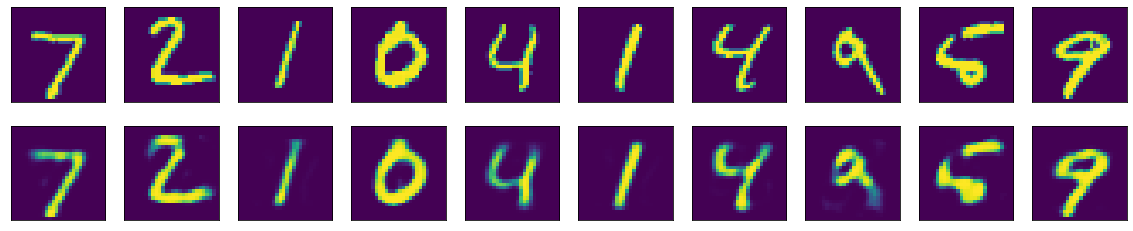

In [7]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Tak wyglądają zakodowane obiekty:

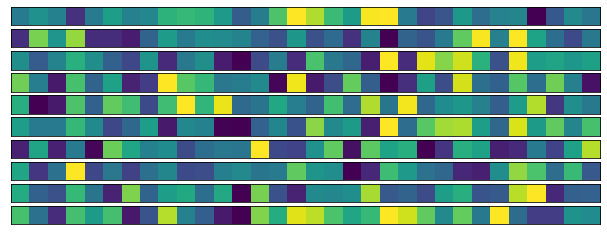

In [8]:
n = 10  # How many digits we will display
plt.figure(figsize=(100, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(n, 1, i + 1)
    plt.imshow(encoded_imgs[i].reshape(1, -1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## 2.2 Dodatkowe ograniczenie dla enkodera

W poprzednim przykładzie jedynym ograniczeniem jakie narzuciliśmy było ograniczenie liczby perceptronów w ukrytej warstwie (32). W takie sytuacji otrzymujemy zwykle przybliżenie PCA, za pomocą którego również można uogólniać obrazy. W celu dodatkowego ograczania szczegółowości kodowania można narzucić regularyzację w warstwie kodującej. W ten sposób można zwiększyć rzadkość w warstwie kodującej czyli zwiększyć kompresję informacji względem PCA.

In [9]:
# Architektura
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
# Kompilacja
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
# Trening
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2866 - val_loss: 0.1983
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1789 - val_loss: 0.1621
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1532 - val_loss: 0.1433
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1384 - val_loss: 0.1317
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1286 - val_loss: 0.1234
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1215 - val_loss: 0.1174
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1165 - val_loss: 0.1132
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1129 - val_loss: 0.1104
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1105 - val_loss: 0.1083
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1089 - val_lo

In [10]:
# Średnia wartosci w poprzednich prognozach
encoded_imgs.mean()

8.556738

In [11]:
# Generujemy obrazy:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [12]:
# Średnia wartosci w nowych prognozach
encoded_imgs.mean()

8.556738

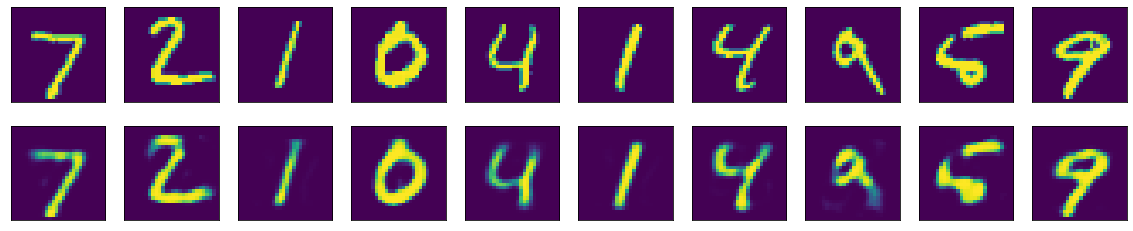

In [13]:
# A sama transformacja bardzo zbliżona
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Deep autoencoder

Wykonajmy teraz encoder z dwie dodatkowymi warstwami kodującymi i rozkodowującymi.

In [14]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [15]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2417 - val_loss: 0.1596
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1456 - val_loss: 0.1334
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1282 - val_loss: 0.1202
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1180 - val_loss: 0.1134
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1126 - val_loss: 0.1089
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1084 - val_loss: 0.1056
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1054 - val_loss: 0.1033
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1030 - val_loss: 0.1016
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1010 - val_loss: 0.0995
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0994 - val_lo

Osiągnęliśmy lepsze dopasowanie. Popatrzmy na wizualizację wyników:

In [16]:
# Generujemy obrazy:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

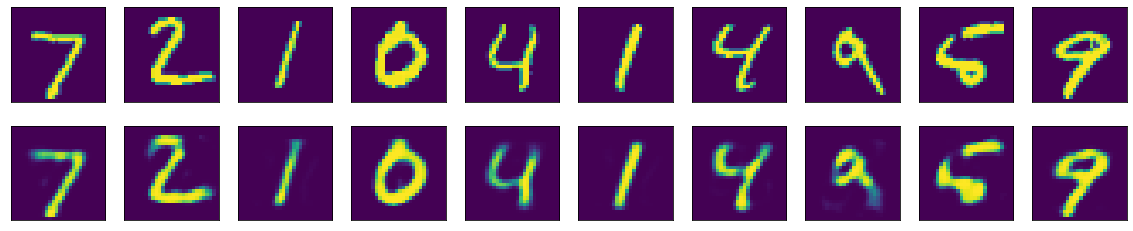

In [17]:
# A sama transformacja bardzo zbliżona
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.4 Convolutional autoencoder

Ponieważ znamy sieci konwolucyjne, spójrzmy na przykład wykorzystania filtrów w autoencoderach.

In [18]:
# Architektura sieci
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

Wczytujemy jeszcze raz dane - tym razem powinny być tensorem 3D.

In [19]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [20]:
%load_ext tensorboard
%tensorboard --logdir='tmp'

In [21]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='./tmp')])


Epoch 1/50
469/469 [==============================] - 41s 87ms/step - loss: 0.2113 - val_loss: 0.1433
Epoch 2/50
469/469 [==============================] - 46s 98ms/step - loss: 0.1340 - val_loss: 0.1268
Epoch 3/50
469/469 [==============================] - 41s 88ms/step - loss: 0.1227 - val_loss: 0.1177
Epoch 4/50
469/469 [==============================] - 41s 87ms/step - loss: 0.1161 - val_loss: 0.1122
Epoch 5/50
469/469 [==============================] - 42s 90ms/step - loss: 0.1118 - val_loss: 0.1090
Epoch 6/50
469/469 [==============================] - 40s 85ms/step - loss: 0.1091 - val_loss: 0.1072
Epoch 7/50
469/469 [==============================] - 38s 82ms/step - loss: 0.1071 - val_loss: 0.1049
Epoch 8/50
469/469 [==============================] - 40s 84ms/step - loss: 0.1055 - val_loss: 0.1037
Epoch 9/50
469/469 [==============================] - 44s 93ms/step - loss: 0.1042 - val_loss: 0.1023
Epoch 10/50
469/469 [==============================] - 40s 85ms/step - loss: 0.103

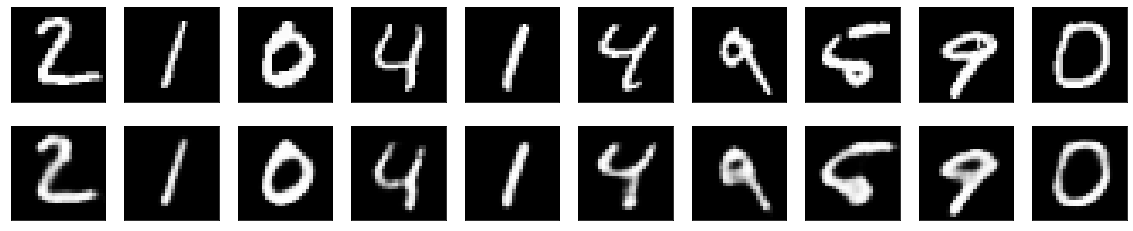

In [22]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

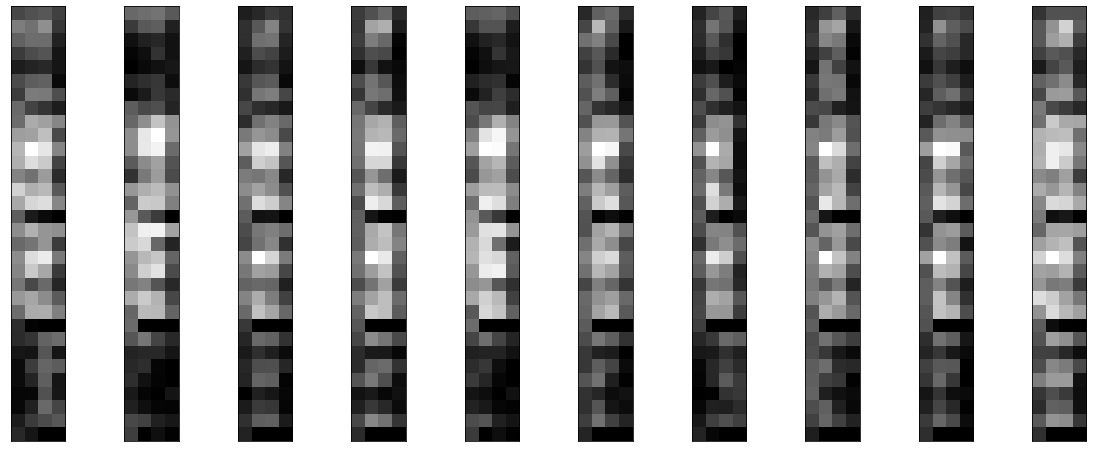

In [23]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.5 Przykład z odszumianiem obrazu

Jak powiedzieliśmy, jedną z funkcji autoenkoderów jest odszumianie obrazów. Dodajmy szum do naszych cyfr, żeby przekonać się czy autoenkoder sobie z tym poradzi:

In [24]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

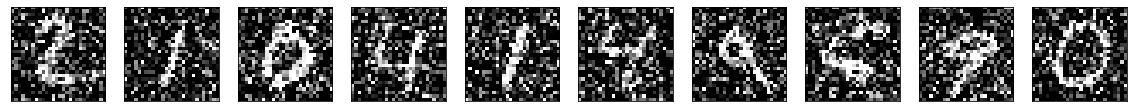

In [25]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Architekturę zaplanujemy tą samą co ostatnio:

In [26]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Trenowanie modelu przez sto epok:

In [27]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])


Epoch 1/100
469/469 [==============================] - 89s 189ms/step - loss: 0.1648 - val_loss: 0.1166
Epoch 2/100
469/469 [==============================] - 82s 176ms/step - loss: 0.1136 - val_loss: 0.1090
Epoch 3/100
469/469 [==============================] - 91s 195ms/step - loss: 0.1081 - val_loss: 0.1060
Epoch 4/100
469/469 [==============================] - 81s 174ms/step - loss: 0.1050 - val_loss: 0.1032
Epoch 5/100
469/469 [==============================] - 93s 199ms/step - loss: 0.1032 - val_loss: 0.1015
Epoch 6/100
469/469 [==============================] - 84s 180ms/step - loss: 0.1019 - val_loss: 0.1008
Epoch 7/100
469/469 [==============================] - 87s 186ms/step - loss: 0.1008 - val_loss: 0.0998
Epoch 8/100
469/469 [==============================] - 87s 186ms/step - loss: 0.1000 - val_loss: 0.0988
Epoch 9/100
469/469 [==============================] - 92s 196ms/step - loss: 0.0993 - val_loss: 0.0982
Epoch 10/100
469/469 [==============================] - 89s 190m

469/469 [==============================] - 97s 206ms/step - loss: 0.0934 - val_loss: 0.0934
Epoch 80/100
469/469 [==============================] - 86s 184ms/step - loss: 0.0934 - val_loss: 0.0934
Epoch 81/100
469/469 [==============================] - 93s 198ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 82/100
469/469 [==============================] - 82s 174ms/step - loss: 0.0934 - val_loss: 0.0934
Epoch 83/100
469/469 [==============================] - 93s 198ms/step - loss: 0.0934 - val_loss: 0.0932
Epoch 84/100
469/469 [==============================] - 81s 172ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 85/100
469/469 [==============================] - 93s 198ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 86/100
469/469 [==============================] - 86s 184ms/step - loss: 0.0934 - val_loss: 0.0938
Epoch 87/100
469/469 [==============================] - 88s 189ms/step - loss: 0.0933 - val_loss: 0.0934
Epoch 88/100
469/469 [==============================] - 90s 193ms/st

### Więcej informacji:
* https://blog.keras.io/building-autoencoders-in-keras.html